<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Beginner_Object_Detection_with_YOLOv8_and_LabelImg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bounding_Box_Annotation_and_Training_YOLOv8

## 🧠 What is Annotation?

**Annotation** in object detection means labeling objects in an image by drawing **bounding boxes** around them and assigning a class label.
This is essential for training models like YOLO, SSD, and Faster R-CNN.

---

## ✍️ Methods of Bounding Box Annotation

You can annotate images in one of the following ways:

### ✅ Recommended Tool-Based Annotation:

1. **[LabelImg](https://github.com/heartexlabs/labelImg)** (Desktop)
2. **[Makesense.ai](https://www.makesense.ai/)** (Online)
3. **[Roboflow Annotate](https://app.roboflow.com/)** (Online, account needed)

---

## 📌 1. **How to Annotate using LabelImg (Easiest for Offline Work)**

### 🔧 Step-by-Step Setup

### ✅ Step 1: Install LabelImg

**Windows:**

* Download Windows .exe from [releases](https://github.com/heartexlabs/labelImg/releases)
  **Linux/macOS/Colab:**

```bash
# You can try this on Colab for GUI with X11 if needed (advanced)
!git clone https://github.com/heartexlabs/labelImg.git
!pip install pyqt5 lxml
%cd labelImg
!make qt5py3
```

---

### ✅ Step 2: Open the Tool

```bash
# Windows:
labelImg.exe
```

### ✅ Step 3: Load Image Folder

* Click: `Open Dir` → select the folder containing images (e.g., `bbox_dataset/images/train`)

---

### ✅ Step 4: Select Save Format

* Menu → **PascalVOC** or **YOLO** format (choose YOLO for object detection)
* Set annotation folder to `bbox_dataset/labels/train`

---

### ✅ Step 5: Annotate

* Click **"Create RectBox"**
* Draw box on object → enter class label (e.g., `dog`, `car`)
* Save using **Ctrl + S** or click Save icon

---

### ✅ Step 6: Annotations are saved as `.txt` files in YOLO format:

Example of `dog.jpg` → `dog.txt`:

```
0 0.512 0.480 0.210 0.320
```

This means:

```
class_id x_center y_center width height  (normalized between 0 and 1)
```

---

## 📌 2. **How to Annotate using Makesense.ai (No Installation Needed)**

### 🌐 Website: [https://www.makesense.ai/](https://www.makesense.ai/)

### Steps:

1. Click "Get Started"
2. Upload your images (can be ZIP or multiple files)
3. Choose **Object Detection**
4. Add your class labels (e.g., `cat`, `bottle`, etc.)
5. Draw bounding boxes
6. Export → Choose **YOLO format**

It downloads `.txt` files and one file per image.

---

## 📌 3. **How to Manually Annotate Inside Jupyter notebook (Drawing Bounding Boxes)**

If you want to draw boxes with mouse inside a notebook using OpenCV (like a mini-LabelImg):

This script only works on your local machine (Python installed, OpenCV installed with GUI support):

```python
import cv2

def draw_box(image_path):
    img = cv2.imread(image_path)
    clone = img.copy()
    bboxes = []

    # ✅ Define these variables in the enclosing scope first
    x_start, y_start = -1, -1
    drawing = False

    def draw(event, x, y, flags, param):
        nonlocal x_start, y_start, drawing

        if event == cv2.EVENT_LBUTTONDOWN:
            x_start, y_start = x, y
            drawing = True

        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            x_end, y_end = x, y
            cv2.rectangle(img, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
            bboxes.append((x_start, y_start, x_end, y_end))

    cv2.namedWindow("Annotation Tool")
    cv2.setMouseCallback("Annotation Tool", draw)

    print("Press 'q' to finish annotation")
    while True:
        cv2.imshow("Annotation Tool", img)
        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):
            break

    cv2.destroyAllWindows()
    return bboxes

```

> ⚠️ This works only in local Python, not in Colab due to GUI limitations.

---

## 🔍 Understanding YOLO Annotation Format (very important!)

Each `.txt` file contains **one line per object**:

```
class_id x_center y_center width height
```

All values are **normalized** between `0 and 1` w\.r.t. image dimensions.

Example:

```plaintext
0 0.5 0.5 0.3 0.4
```

This means:

* class\_id = 0 (e.g., 'cat')
* bounding box center is at (50% width, 50% height)
* box size is 30% width × 40% height

---

## 🛠 You can Practice This:

* Annotate 5–10 images using [Makesense.ai](https://www.makesense.ai/)
* Export in YOLO format
* Upload to Colab
* Train YOLOv8 on it


import os
import xml.etree.ElementTree as ET

# Classes in the dataset
CLASSES = ['apple', 'mango']

# Input and output paths
xml_folder = 'annotations_xml'
output_labels = 'labels'

os.makedirs(output_labels, exist_ok=True)

# Function to convert


def convert(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    img_w = int(root.find('size/width').text)
    img_h = int(root.find('size/height').text)

    yolo_lines = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text.lower()
        if class_name not in CLASSES:
            continue

        class_id = CLASSES.index(class_name)

        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # Convert to YOLO format
        x_center = (xmin + xmax) / 2.0 / img_w
        y_center = (ymin + ymax) / 2.0 / img_h
        width = (xmax - xmin) / img_w
        height = (ymax - ymin) / img_h

        yolo_lines.append(
            f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    return yolo_lines


# Process all XML files
for file in os.listdir(xml_folder):
    if file.endswith(".xml"):
        xml_path = os.path.join(xml_folder, file)
        yolo_data = convert(xml_path)

        txt_filename = file.replace(".xml", ".txt")
        with open(os.path.join(output_labels, txt_filename), "w") as f:
            f.write("\n".join(yolo_data))

print("✅ Conversion completed.")




---



# Custom_Object_Detection_from_Scratch

If you've successfully annotated your mango and apple images using **LabelImg**, and the annotations are saved in **Pascal VOC XML format**

### ✅ Your next steps are:

1. **Convert the Pascal VOC (XML) annotations to YOLO format**
2. **Organize dataset into YOLO folder structure**
3. **Train YOLOv8 on this data using Google Colab**

---

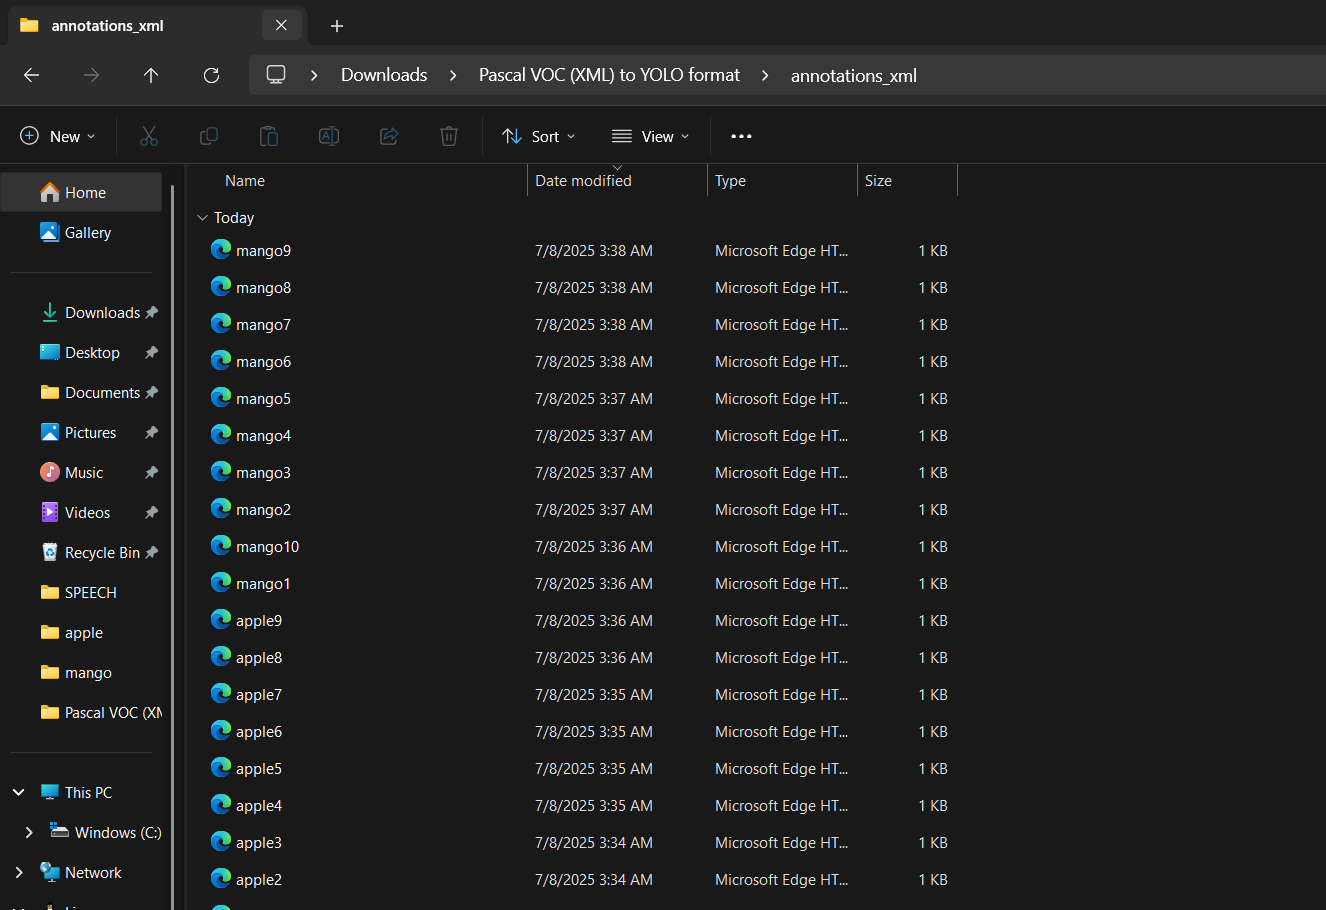

## 🔁 Step 1: Convert Pascal VOC (XML) to YOLO format

Here is a full Python script to convert your XML annotations to YOLO format:

### 🐍 Python Script: `convert_voc_to_yolo.py`

```python
import os
import xml.etree.ElementTree as ET

# Classes in the dataset
CLASSES = ['apple', 'mango']

# Input and output paths
xml_folder = 'annotations_xml'
output_labels = 'labels'

os.makedirs(output_labels, exist_ok=True)

# Function to convert
def convert(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    img_w = int(root.find('size/width').text)
    img_h = int(root.find('size/height').text)

    yolo_lines = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text.lower()
        if class_name not in CLASSES:
            continue

        class_id = CLASSES.index(class_name)

        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # Convert to YOLO format
        x_center = (xmin + xmax) / 2.0 / img_w
        y_center = (ymin + ymax) / 2.0 / img_h
        width = (xmax - xmin) / img_w
        height = (ymax - ymin) / img_h

        yolo_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    return yolo_lines

# Process all XML files
for file in os.listdir(xml_folder):
    if file.endswith(".xml"):
        xml_path = os.path.join(xml_folder, file)
        yolo_data = convert(xml_path)

        txt_filename = file.replace(".xml", ".txt")
        with open(os.path.join(output_labels, txt_filename), "w") as f:
            f.write("\n".join(yolo_data))

print("✅ Conversion completed.")
```

### 🔧 What to do:

1. Put all your `.xml` files in a folder: `annotations_xml/`
2. Run the above script
3. The output `.txt` files (YOLO format) will go into `labels/`

---

## 📁 Step 2: Organize Dataset Folder

You need this structure:

```
YOLO_dataset/
├── images/
│   ├── train/
│   │   ├── apple1.jpg
│   │   ├── mango1.jpg
├── labels/
│   ├── train/
│   │   ├── apple1.txt
│   │   ├── mango1.txt
├── data.yaml
```

---

## 📄 Step 3: Create `data.yaml` File

Create a file `data.yaml` like this:

```yaml
path: /content/YOLO_dataset
train: images/train
val: images/train  # or create a validation split later

names:
  0: apple
  1: mango
```

---

## 🧪 Step 4: Train YOLOv8 in Google Colab

Now upload this to Colab and run the following:

### ▶️ Colab Commands

```python
# 1. Install YOLOv8
!pip install -q ultralytics
from ultralytics import YOLO

# 2. Load YOLOv8 model
model = YOLO("yolov8n.yaml")  # or use yolov8s.yaml

# 3. Train
model.train(data="YOLO_dataset/data.yaml", epochs=20, imgsz=416)
```

---

## 🧪 Step 5: Run Inference on a Test Image

```python
# Inference on one of your test images
results = model.predict(source="YOLO_dataset/images/train/mango9.jpeg", save=True, conf=0.5)
```

This will save prediction images in `runs/detect/predict/`.

---

## 🧳 Optional: Zip for Upload to Colab

You can ZIP your full folder (`YOLO_dataset`) and upload to Colab:

```python
from google.colab import files
uploaded = files.upload()  # upload your zip file
!unzip YOLO_dataset.zip
```

---





---



# **Pascal VOC (XML) to YOLO format**

In [1]:
# import os
# import xml.etree.ElementTree as ET

# # Classes in the dataset
# CLASSES = ['apple', 'mango']

# # Input and output paths
# xml_folder = 'annotations_xml'
# output_labels = 'labels'

# os.makedirs(output_labels, exist_ok=True)

# # Function to convert


# def convert(xml_file):
#     tree = ET.parse(xml_file)
#     root = tree.getroot()

#     img_w = int(root.find('size/width').text)
#     img_h = int(root.find('size/height').text)

#     yolo_lines = []

#     for obj in root.findall('object'):
#         class_name = obj.find('name').text.lower()
#         if class_name not in CLASSES:
#             continue

#         class_id = CLASSES.index(class_name)

#         bndbox = obj.find('bndbox')
#         xmin = int(bndbox.find('xmin').text)
#         ymin = int(bndbox.find('ymin').text)
#         xmax = int(bndbox.find('xmax').text)
#         ymax = int(bndbox.find('ymax').text)

#         # Convert to YOLO format
#         x_center = (xmin + xmax) / 2.0 / img_w
#         y_center = (ymin + ymax) / 2.0 / img_h
#         width = (xmax - xmin) / img_w
#         height = (ymax - ymin) / img_h

#         yolo_lines.append(
#             f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

#     return yolo_lines


# # Process all XML files
# for file in os.listdir(xml_folder):
#     if file.endswith(".xml"):
#         xml_path = os.path.join(xml_folder, file)
#         yolo_data = convert(xml_path)

#         txt_filename = file.replace(".xml", ".txt")
#         with open(os.path.join(output_labels, txt_filename), "w") as f:
#             f.write("\n".join(yolo_data))

# print("Conversion completed.")


# YOLOv8_Tutorial_Apple_vs_Mango

# upload and unzip dataset

In [2]:
# from google.colab import files
# uploaded = files.upload()  # upload your zip file
!unzip YOLO_dataset.zip


Archive:  YOLO_dataset.zip
   creating: YOLO_dataset/
  inflating: YOLO_dataset/data.yaml  
   creating: YOLO_dataset/images/
   creating: YOLO_dataset/images/train/
  inflating: YOLO_dataset/images/train/apple1.jpeg  
  inflating: YOLO_dataset/images/train/apple10.jpeg  
  inflating: YOLO_dataset/images/train/apple2.jpeg  
  inflating: YOLO_dataset/images/train/apple3.jpeg  
  inflating: YOLO_dataset/images/train/apple4.jpeg  
  inflating: YOLO_dataset/images/train/apple5.jpeg  
  inflating: YOLO_dataset/images/train/apple6.jpeg  
  inflating: YOLO_dataset/images/train/apple7.jpeg  
  inflating: YOLO_dataset/images/train/apple8.jpeg  
  inflating: YOLO_dataset/images/train/apple9.jpeg  
  inflating: YOLO_dataset/images/train/mango1.jpeg  
  inflating: YOLO_dataset/images/train/mango10.jpeg  
  inflating: YOLO_dataset/images/train/mango2.jpeg  
  inflating: YOLO_dataset/images/train/mango3.jpeg  
  inflating: YOLO_dataset/images/train/mango4.jpeg  
  inflating: YOLO_dataset/images/trai

check annotation

In [3]:
!head YOLO_dataset/labels/train/mango9.txt


1 0.500000 0.598361 0.607273 0.508197

# Show your image and label

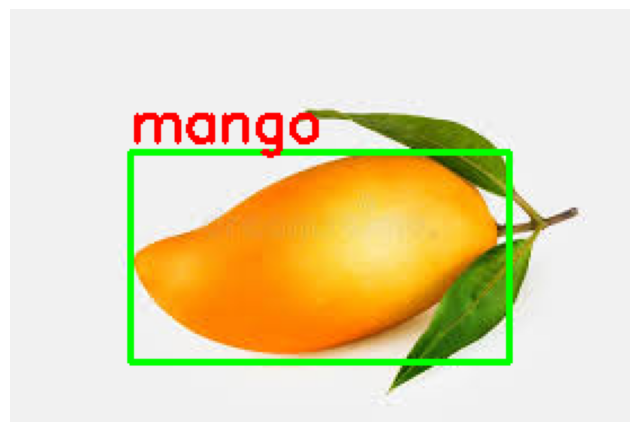

In [4]:
import cv2
import matplotlib.pyplot as plt

def show_yolo_label(img_path, label_path, class_names=["apple", "mango"]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)

        label = class_names[int(cls)]
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 2)

    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show your image and label
show_yolo_label("YOLO_dataset/images/train/mango9.jpeg", "YOLO_dataset/labels/train/mango9.txt")


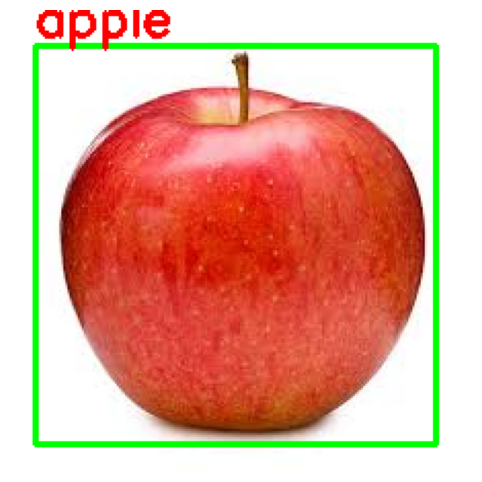

In [5]:
import cv2
import matplotlib.pyplot as plt

def show_yolo_label(img_path, label_path, class_names=["apple", "mango"]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)

        label = class_names[int(cls)]
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 2)

    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show your image and label
show_yolo_label("YOLO_dataset/images/train/apple9.jpeg", "YOLO_dataset/labels/train/apple9.txt")


# Train Model

In [6]:
# Step 1: Install Ultralytics
!pip install -q ultralytics
from ultralytics import YOLO
from IPython.display import Image

# Step 2: Load Pretrained Model (Transfer Learning)
model = YOLO("yolov8n.pt")  # use pretrained weights instead of training from scratch

# Step 3: Train with Enhanced Config
results = model.train(
    data="YOLO_dataset/data.yaml",   # path to data config
    epochs=200,                      # more epochs for small dataset
    imgsz=416,                       # standard YOLO input size
    batch=4,                         # small batch size for low GPU/RAM
    patience=20,                     # early stopping patience
    name="mango_apple_detector",     # custom run name
    save=True,                       # save final and best models
    save_period=10,                  # save checkpoint every 10 epochs
    cache=True,                      # cache images in memory for speed
    project="runs/train",            # output directory
    val=True,                        # run validation at end of every epoch
    verbose=True                     # show progress
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyti

100%|██████████| 6.25M/6.25M [00:00<00:00, 156MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=YOLO_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=mango_apple_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrai

100%|██████████| 755k/755k [00:00<00:00, 39.4MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751702  ultralytics.nn.modules.head.Detect           [2, [64, 128, 256]]           
Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.3±11.9 MB/s, size: 5.0 KB)


train: Scanning /content/YOLO_dataset/labels/train... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 1406.30it/s]

train: New cache created: /content/YOLO_dataset/labels/train.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.0GB RAM): 100%|██████████| 20/20 [00:00<00:00, 540.35it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 167.5±64.4 MB/s, size: 4.5 KB)


val: Scanning /content/YOLO_dataset/labels/train.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.0GB RAM): 100%|██████████| 20/20 [00:00<00:00, 621.65it/s]


Plotting labels to runs/train/mango_apple_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/train/mango_apple_detector
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200         0G     0.9744      2.779      1.352         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all         20         20    0.00426          1      0.423      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200         0G     0.9647      2.722      1.339         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20    0.00376          1      0.524      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200         0G     0.8801      2.546       1.27         12        416: 100%|██████████| 5/5 [00:08<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20    0.00355          1      0.609      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200         0G     0.7843      2.371      1.192         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         20         20    0.00333          1      0.666      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200         0G     0.7233      2.168      1.182          7        416: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         20         20    0.00337          1      0.663      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200         0G      0.886       1.96       1.28         11        416: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all         20         20      0.498      0.997       0.61      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200         0G     0.7815      1.725      1.195         10        416: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all         20         20      0.528      0.809      0.649      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200         0G     0.8229      1.704      1.213          8        416: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.528      0.809      0.649      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200         0G      0.938      1.748      1.463          9        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.455       0.95      0.697      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200         0G     0.9559      1.541      1.328         12        416: 100%|██████████| 5/5 [00:08<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all         20         20      0.529      0.758      0.696      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200         0G     0.8377      1.611      1.243         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.529      0.758      0.696      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200         0G     0.7885      1.585      1.169          9        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.729        0.7      0.796      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200         0G      0.872      1.337      1.221         11        416: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all         20         20      0.729        0.7      0.796      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200         0G     0.9191      1.501      1.237         13        416: 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         20         20      0.729        0.7      0.796      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200         0G     0.8208      1.358      1.248          7        416: 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         20         20      0.793      0.771      0.851      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200         0G     0.8885      1.326      1.262          9        416: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.793      0.771      0.851      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200         0G     0.9418      1.274      1.255         14        416: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         20         20      0.793      0.771      0.851      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200         0G     0.9536       1.47       1.36         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         20         20       0.77       0.85      0.838      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200         0G     0.7301      1.171      1.127         15        416: 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         20         20       0.77       0.85      0.838      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200         0G     0.8334      1.154      1.264         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all         20         20       0.77       0.85      0.838      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200         0G     0.9812      1.362      1.314          9        416: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]

                   all         20         20      0.628      0.824      0.853      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200         0G     0.8852      1.127      1.221         14        416: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all         20         20      0.628      0.824      0.853      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200         0G     0.7134      1.172      1.162         12        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all         20         20      0.628      0.824      0.853      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200         0G     0.9021      1.274      1.237         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all         20         20      0.791      0.805      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200         0G      0.974      1.279      1.327          6        416: 100%|██████████| 5/5 [00:10<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all         20         20      0.791      0.805      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200         0G      0.717      1.101      1.129          8        416: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.791      0.805      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200         0G     0.8352      1.183      1.211          9        416: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         20         20      0.642      0.893      0.774      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200         0G     0.8286      1.125      1.272         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]

                   all         20         20      0.642      0.893      0.774      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200         0G     0.8863      1.134      1.205          9        416: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         20         20      0.642      0.893      0.774      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200         0G     0.8811      1.184      1.303         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all         20         20      0.712      0.982      0.912       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200         0G     0.8216      1.069      1.154         16        416: 100%|██████████| 5/5 [00:08<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.05s/it]

                   all         20         20      0.712      0.982      0.912       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200         0G     0.7905      1.082      1.221         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.712      0.982      0.912       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200         0G     0.9307      1.107      1.196         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.712      0.982      0.912       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200         0G     0.9006      1.051      1.238         10        416: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all         20         20      0.974          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200         0G     0.8686      1.025      1.187         11        416: 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all         20         20      0.974          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200         0G     0.9135      1.203      1.284          6        416: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all         20         20      0.974          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200         0G      0.928      1.051      1.208         12        416: 100%|██████████| 5/5 [00:08<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.942          1      0.981      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200         0G     0.8349      1.075      1.141         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.942          1      0.981      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200         0G     0.8463      1.013      1.277          9        416: 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]

                   all         20         20      0.942          1      0.981      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200         0G     0.8694      1.038      1.158         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all         20         20      0.928       0.95      0.972       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200         0G     0.8003      1.178      1.218         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all         20         20      0.928       0.95      0.972       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200         0G     0.8849     0.9821      1.192          7        416: 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all         20         20      0.928       0.95      0.972       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200         0G     0.8135      1.003      1.164          9        416: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]

                   all         20         20      0.987          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200         0G     0.8181      1.009      1.199         10        416: 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         20         20      0.987          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200         0G     0.8356      1.042      1.194         10        416: 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all         20         20      0.987          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200         0G     0.8322      1.136      1.151          8        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all         20         20      0.989          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200         0G     0.7319     0.9534      1.094         14        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.989          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200         0G     0.6503     0.8563      1.058          6        416: 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.989          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200         0G     0.7959       1.03      1.205         14        416: 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all         20         20      0.989          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200         0G     0.6725     0.9113      1.102          9        416: 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         20         20      0.988          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200         0G     0.7345     0.9009      1.119         14        416: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all         20         20      0.988          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200         0G     0.7271     0.9482      1.123         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all         20         20      0.988          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200         0G     0.6915     0.8159      1.065         12        416: 100%|██████████| 5/5 [00:08<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.979          1      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200         0G     0.6917     0.9139      1.168          8        416: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.979          1      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200         0G     0.8059     0.8849      1.164          9        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         20         20      0.979          1      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200         0G     0.7466     0.8457      1.115         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all         20         20      0.931      0.999      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200         0G     0.6946     0.8108      1.099          8        416: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all         20         20      0.931      0.999      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200         0G     0.7685     0.9017      1.141         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all         20         20      0.931      0.999      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200         0G     0.7318     0.9462      1.139          9        416: 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all         20         20      0.958      0.989      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200         0G     0.7145      1.085      1.087          8        416: 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         20         20      0.958      0.989      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200         0G     0.7087     0.8807      1.058         16        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         20         20      0.958      0.989      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200         0G     0.8077     0.9731      1.194         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.993          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200         0G      0.911     0.9384      1.191         10        416: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all         20         20      0.993          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200         0G     0.7855     0.8747      1.136         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all         20         20      0.993          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200         0G     0.7518     0.8694      1.121          7        416: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all         20         20      0.993          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200         0G     0.7564     0.8963      1.116         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         20         20      0.991          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200         0G     0.8932     0.8772      1.174         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.991          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200         0G     0.7657     0.8504      1.104          9        416: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         20         20      0.991          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200         0G     0.6956      1.073      1.152          6        416: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         20         20      0.993          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200         0G     0.8183     0.8903      1.128         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         20         20      0.993          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200         0G      0.789     0.8142      1.121         11        416: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         20         20      0.993          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200         0G     0.8305     0.8261       1.14          9        416: 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         20         20      0.992          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200         0G     0.6913     0.7602      1.024         14        416: 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.992          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200         0G     0.7591     0.9793      1.178         11        416: 100%|██████████| 5/5 [00:09<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         20         20      0.992          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200         0G     0.8411      1.039      1.218          7        416: 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20       0.99          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200         0G     0.6943     0.7763      1.122         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all         20         20       0.99          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200         0G     0.6315     0.7613      1.029         10        416: 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all         20         20       0.99          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200         0G     0.6878     0.9367      1.098          8        416: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all         20         20      0.991          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200         0G     0.7348     0.8774      1.113         10        416: 100%|██████████| 5/5 [00:10<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]

                   all         20         20      0.991          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200         0G     0.6669       0.74      1.051         14        416: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         20         20      0.991          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200         0G     0.7041     0.8443      1.121         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all         20         20      0.991          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200         0G     0.5848      0.796       1.03         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all         20         20      0.989      0.999      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200         0G     0.7188     0.8327      1.117         14        416: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         20         20      0.989      0.999      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200         0G     0.7178      0.896      1.089         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all         20         20      0.989      0.999      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200         0G     0.7525     0.8512      1.098          7        416: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]

                   all         20         20      0.991          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200         0G     0.7386     0.8381      1.083         11        416: 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all         20         20      0.991          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200         0G     0.6713     0.7961      1.121         10        416: 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.991          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200         0G     0.7437     0.7644      1.082          8        416: 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.994          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200         0G     0.6976     0.8086       1.11         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all         20         20      0.994          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200         0G     0.6873     0.7175      1.082         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all         20         20      0.994          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200         0G     0.6873     0.8197      1.082         13        416: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all         20         20      0.994          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200         0G      0.701     0.7594      1.092         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]

                   all         20         20      0.994          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200         0G     0.6519      0.724      1.068         12        416: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         20         20      0.994          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200         0G     0.6859     0.8105      1.061         13        416: 100%|██████████| 5/5 [00:08<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.994          1      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200         0G      0.661     0.7529      1.061         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all         20         20      0.994          1      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200         0G     0.6651     0.7631      1.065         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all         20         20      0.994          1      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200         0G     0.6146     0.6885      1.042         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         20         20      0.994          1      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200         0G     0.6477     0.6902      1.091          9        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all         20         20      0.995          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200         0G     0.6244     0.7926       1.04         13        416: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all         20         20      0.995          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200         0G     0.6836     0.7726      1.148         11        416: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all         20         20      0.995          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200         0G     0.5814     0.7173      1.055         14        416: 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.993          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200         0G     0.6092     0.7754      1.034          8        416: 100%|██████████| 5/5 [00:08<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         20         20      0.993          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200         0G     0.5622     0.7324      1.038         12        416: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all         20         20      0.993          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200         0G     0.6609      0.774      1.124          7        416: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.994          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200         0G     0.5811     0.6819      1.033         14        416: 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all         20         20      0.994          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200         0G     0.6336     0.7119     0.9903         13        416: 100%|██████████| 5/5 [00:08<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all         20         20      0.994          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200         0G     0.6109      0.688      1.074          8        416: 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all         20         20      0.994          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200         0G     0.7432     0.7968      1.134          7        416: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all         20         20      0.994          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200         0G     0.7204     0.7871      1.123         11        416: 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         20         20      0.994          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200         0G       0.54     0.7046      1.009         12        416: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.995          1      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200         0G     0.5953     0.7186      1.072         11        416: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all         20         20      0.995          1      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200         0G     0.6781     0.7582      1.077         13        416: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.995          1      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200         0G     0.6375     0.7189      1.063         15        416: 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.05s/it]

                   all         20         20      0.995          1      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200         0G     0.6618     0.7805      1.061         13        416: 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]

                   all         20         20      0.995          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200         0G     0.6016     0.6725      1.014         10        416: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all         20         20      0.995          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200         0G     0.6345     0.6635      1.009         15        416: 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         20         20      0.995          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200         0G     0.6552     0.7623      1.097          9        416: 100%|██████████| 5/5 [00:09<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.995          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200         0G     0.7389     0.7453      1.207         12        416: 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.995          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200         0G     0.5267     0.6679      1.023          7        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all         20         20      0.995          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200         0G     0.5788     0.6724      1.102         11        416: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all         20         20      0.995          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200         0G     0.5774      0.712      1.049         13        416: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all         20         20      0.995          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200         0G     0.7374     0.7685      1.146         10        416: 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all         20         20      0.995          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200         0G     0.6474     0.7083      1.036         13        416: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all         20         20      0.995          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200         0G     0.5829     0.6726      1.029         10        416: 100%|██████████| 5/5 [00:09<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]

                   all         20         20      0.995          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200         0G     0.4241     0.6506     0.9327         13        416: 100%|██████████| 5/5 [00:09<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all         20         20      0.995          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200         0G     0.5613     0.6975     0.9967         12        416: 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         20         20      0.994          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200         0G      0.544     0.6607      1.019         10        416: 100%|██████████| 5/5 [00:08<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all         20         20      0.994          1      0.995       0.92
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 107, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



127 epochs completed in 0.401 hours.
Optimizer stripped from runs/train/mango_apple_detector/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/mango_apple_detector/weights/best.pt, 6.2MB

Validating runs/train/mango_apple_detector/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]


                   all         20         20      0.994          1      0.995      0.953
                 apple         10         10      0.992          1      0.995      0.947
                 mango         10         10      0.995          1      0.995      0.958
Speed: 3.3ms preprocess, 124.0ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/train/mango_apple_detector


# Test Model

In [7]:
# Inference on one of your test images
results = model.predict(source="YOLO_dataset/images/train/apple9.jpeg", save=True, conf=0.5)



image 1/1 /content/YOLO_dataset/images/train/apple9.jpeg: 416x416 1 apple, 125.7ms
Speed: 3.1ms preprocess, 125.7ms inference, 5.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/train/mango_apple_detector2


# Look for image files in the prediction directory

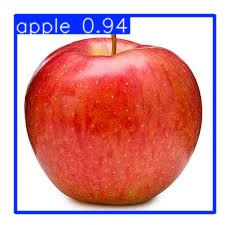

In [9]:
from IPython.display import Image, display
import os

output_folder = "runs/train/mango_apple_detector2"
# Look for image files in the prediction directory
for file in os.listdir(output_folder):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
        display(Image(filename=os.path.join(output_folder, file)))


# Download Model

In [11]:
from google.colab import files
# files.download('runs/detect/train/weights/best.pt')
files.download('/content/runs/train/mango_apple_detector/weights/best.pt')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Bonus:** If you want to do prediction using your trained saved model follow these steps:

Install YOLOv8 (if not already)

In [12]:
# !pip install -q ultralytics

Load Your Model

In [13]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/train/mango_apple_detector/weights/best.pt")


Or if you uploaded the .pt file from your system:

In [14]:
# from google.colab import files
# uploaded = files.upload()  # Then choose your `best.pt` file

# Now load it
# model = YOLO("best.pt")


Run Inference on an Image

In [16]:
results = model.predict(source="mango.png", conf=0.5, save=True)



image 1/1 /content/mango.png: 416x416 1 mango, 155.8ms
Speed: 3.3ms preprocess, 155.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict


View the Prediction Output

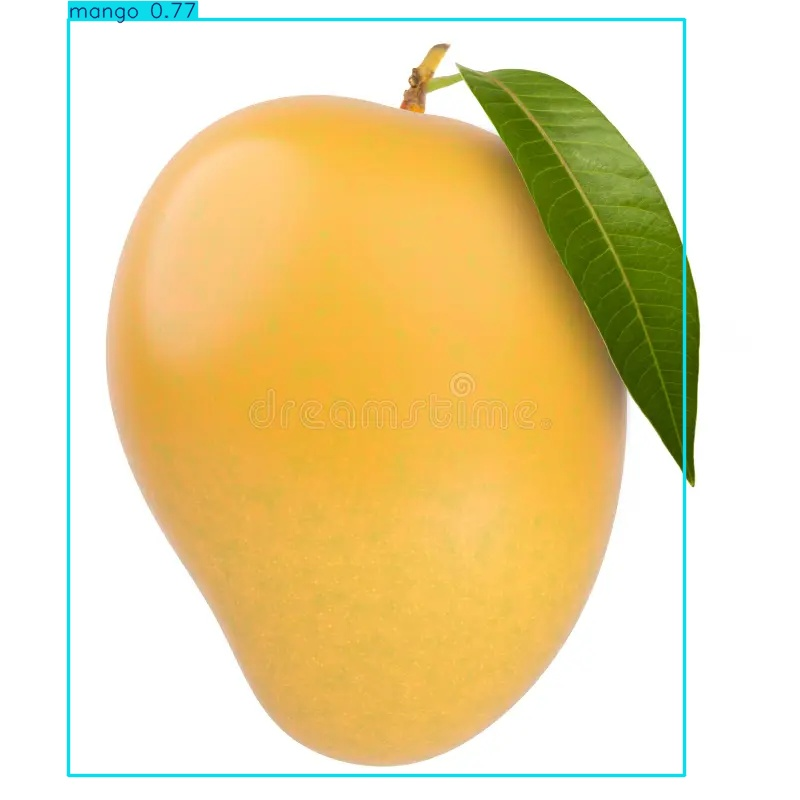

In [17]:
import os
from IPython.display import Image, display

image_path = "runs/detect/predict/mango.jpg"

if os.path.exists(image_path):
    display(Image(filename=image_path))
else:
    print("Image not found:", image_path)


In [23]:
results = model.predict(source="orange1.jpeg", conf=0.5, save=True)



image 1/1 /content/orange1.jpeg: 416x416 (no detections), 166.4ms
Speed: 3.7ms preprocess, 166.4ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict


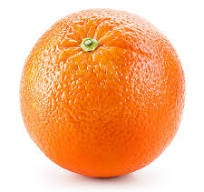

In [24]:
import os
from IPython.display import Image, display

image_path = "runs/detect/predict/orange1.jpg"

if os.path.exists(image_path):
    display(Image(filename=image_path))
else:
    print("Image not found:", image_path)


# Exercise ToDo



---

## **Simple Object Detection Ideas (for 10–20 images per class)**

These pairs work well because they are:

* Visually distinct
* Easy to photograph or download
* Easy to annotate with bounding boxes
* Real-world relevant for small projects or demos

---

### 🍫 1. **Pen vs Eraser**

* Very different shapes and colors
* You can collect them easily
* Great for a “stationery item” detector

---

### 🍽 2. **Spoon vs Fork**

* Common kitchen objects
* Easy to photograph
* Good to teach fine shape differences

---

### 🎧 3. **Headphones vs Charger**

* Useful for distinguishing electronic accessories
* Can be used for object sorters

---

### 🕶 4. **Glasses vs Watch**

* Useful for wearable detection projects
* Clearly different geometry

---

### 🖐️ 5. **Hand vs Fist** (open hand vs closed hand)

* Interesting for gesture detection
* Good intro to pose-aware bounding box models

---

### 📱 6. **Mobile Phone vs Remote Control**

* Look similar — good for learning fine classification
* Good for object confusion experiments

---

### 🪑 7. **Chair vs Table Corner**

* Good for learning furniture detection (room AI)
* May require consistent angles

---

### 🧴 8. **Bottle vs Can**

* Use water bottle vs Coke/Pepsi can
* Easy to collect and annotate

---

### 🧠 Bonus: Use Common Dataset Subsets

You can also grab a few images from larger public datasets like:

* **Google Open Images**
* **Roboflow datasets**
* **Kaggle** subsets

---

## 🧰 Tools You Already Know

| Task       | Tool                                   |
| ---------- | -------------------------------------- |
| Annotation | `LabelImg` (Pascal VOC XML)            |
| Conversion | Python script to YOLO format           |
| Training   | YOLOv8 via Ultralytics                 |
| Platform   | Google Colab                           |
| Testing    | `model.predict(...)` and `results.png` |

---

## 📝 Steps to Follow (Same as Apple/Mango)

1. Collect 5–10 images each of **your new classes**
2. Annotate each using **LabelImg** with bounding boxes
3. Convert Pascal VOC XML to YOLO format
4. Organize into:

   ```
   YOLO_dataset/
   ├── images/train/
   ├── labels/train/
   └── data.yaml
   ```
5. Train with transfer learning:

   ```python
   model = YOLO("yolov8n.pt")
   model.train(data="YOLO_dataset/data.yaml", epochs=100, imgsz=416)
   ```
6. Test with `model.predict(...)`

---

## 🧪 Want to Try Something Fun?

Try:

* **Banana vs Orange** 🍌🍊
* **Mask vs No Mask** 😷❌
* **Thumbs Up vs Thumbs Down** 👍👎
* **Open Book vs Closed Book** 📖📕
* **Keyboard vs Mouse**

All of these work with <10 images per class for basic demos.

---


